## The Projective Line

We have been thinking of the plane as a collection of points, with each point expressed as a pair of coordinates. We have dwelt on how matrices transform points, and common shapes made of points. We now restrict our attention to the transformation of lines through the origin. We will associate each invertible $M\in\maR^{2\times 2}$ with a fractional linear transformation, $\mu$, of the projective line. Our chief goal is the visualization of the graph of $\mu$ for those
$M$ expressed as products $N(\s)A(\alpha)K(\theta)$.

To begin, we note that every **nonzero** $v\in\maR^2$ has an associated **line**;

\begin{equation*}
  \ell(v) \equiv \{av:a\in\maR\}
\end{equation*}

For example, $\ell([1,2]) = \{[a,2a]:a\in\maR\}$. Now, given an $M\in\maR^{2\times 2}$, we may associate a line with $Mv$ when $Mv\ne 0$. 

\begin{exercise}\label{ex:null0}
Show that $M$ takes a nonzero vector to zero if, and only if, $\det(M)=0$.
\end{exercise}

Your solution here.

As a result, given $0\ne v\in\maR^2$ and $M\in\maR^{2\times 2}$ with $\det(M)\ne 0$ we see that $M$ takes the line through $M$ to the line through $Mv$. That is,

\begin{equation} \label{eq:projt}
  M\ell(v) = \ell(Mv)
\end{equation}

In this sense, $M$ takes lines to lines an therefore can be said to act on the **projective line**

\begin{equation}\label{eq:PLine}
  \maP^1 = \{\ell(v): 0\ne v\in\maR^2\}
\end{equation}

In order to best work with this set we seek an alternate labeling of $\ell(v)$. To that end, with regard to Figure \ref{fig:2P1}, we note that every line through the origin, except the one through $[1,0]$, crosses the line $\{[t,1]:t\in\maR\}$ at a unique point

\begin{equation}\label{eq:PLineH}
  \maP^1 = \{[t,1]:t\in\maR\} \cup [1,0].
\end{equation}

We interpret the first piece as simply $\maR$ and the second as "the point at infinity," and so write

\begin{equation}\label{eq:PLineC}
  \boxed{\maP^1 = \maR \cup \infty}
\end{equation}

We note that our use of the definite article in "the point at infinity" was not casual. In particular, as $t$ goes to either $\pm\infty$ in Figure \ref{fig:2P1}, the associated line goes to the line through $[1,0]$. We will eventually
visualize this as curling up the real line and connecting its ends at a common point at infinity.

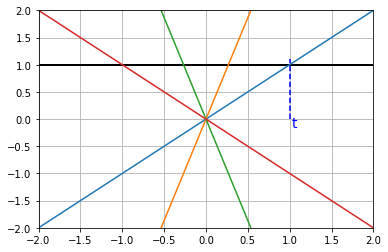

In [3]:
# The projective line 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.plot([-2,2],[1,1],'k', linewidth=2)
theta = np.linspace(np.pi/4,3*np.pi/4,4)
for t in theta:
    plt.plot([-5*np.cos(t), 5*np.cos(t)],[-5*np.sin(t), 5*np.sin(t)])

plt.plot([1,1],[0, 1.1],'b--')
plt.text(1.025,-.15,'t', fontsize=14, color = 'b')
plt.axis([-2,2,-2,2])
plt.grid('on')

\begin{myfig}\label{fig:2P1} An illiustration of the projective line (black) as defined by (\ref{eq:PLineH}). \end{myfig}

We now show that invertible $M$ act on $\maP^1$ via an associated fractional linear transformation.

With regard to Figure \ref{fig:2P1}, for $v=[x,y]$, if $y\ne 0$ then $\ell(v)=\ell([x,y])=\ell([x/y,1])=\ell([t,1])$ where $t=x/y$. Next, with

\begin{equation}
 M = \begin{bmatrix} a & b \\ c & d \end{bmatrix}
\end{equation}

we note that if $\det(M)\ne 0$ then, thanks to Exercise \ref{ex:null0}, $Mv\ne 0$ and so

\begin{equation}\label{eq:ptrans}
  M(\ell(v)) = \ell(Mv) = \ell(M[x,y]) = \ell(M[t,1]) = \ell([at+b,ct+d]) 
    = \begin{cases} \ell\left(\left[\frac{at+b}{ct+d},1\right]\right) &\hbox{if}\hskip 0.2in ct+d \ne 0, \\
         \infty &\hbox{if}\hskip 0.2in ct+d = 0. \end{cases}
\end{equation}

Hence, each invertible matrix $M$ is associated with the **fractional linear transformation**

\begin{equation}\label{eq:flin}
 \boxed{\mu(t) \equiv \frac{at+b}{ct+d}}
\end{equation}

for finite $t$. To see that $\mu(t)$ is indeed well defined when $c\ne 0$ and $t=-d/c$ we note that

\begin{equation} \label{eq:flin2}
  \mu(-d/c) = \frac{b-ad/c}{0} = \infty \hskip 0.3in \hbox{because}\hskip 0.2in b\ne ad/c
\end{equation}

because $\det(M)=ad-bc\ne 0$ by assumption. In a similar fashion we may evaluate

\begin{equation} \label{eq:flin3}
  \mu(\infty) = \frac{a\infty + b}{c\infty + d} = \frac{a + b/\infty}{c + d/\infty} = \frac{a + 0}{c + 0} =a/c
\end{equation}

This last expression, $a/c$, is well defined because $\det(M)\ne 0$ implies that $a$ and $c$ can not both be zero.

As a scalar multiple of the matrix $M$ is unfelt by $\mu$ we may assume that $ad-bc = \pm 1$. We illustrate this mapping in Figure \ref{fig:mu} where $M$, following the decomposition established in Exercise \ref{ex:Mob1}, is a product of a shear, dilation, and rotation.

<IPython.core.display.Javascript object>


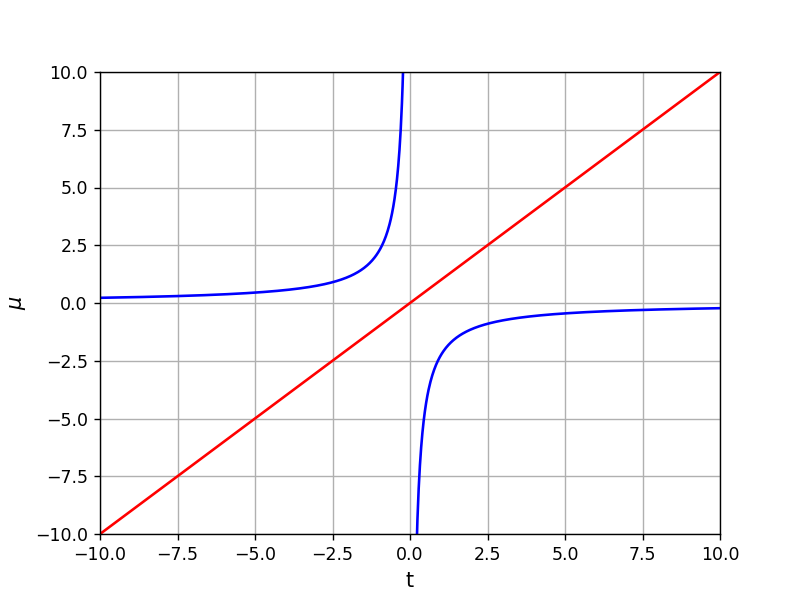

interactive(children=(FloatSlider(value=0.0, description='shear: $\\sigma$', max=10.0, min=-10.0, step=0.2), F…

In [1]:
# fractional linear transformation widget
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

t = np.linspace(-10,10,1001)
fig = plt.figure(' ')

sigma = 0
alpha = 1
theta = 0
N = np.array([[1,sigma],[0,1]])
A = np.array([[alpha,0],[0, 1/alpha]])
K = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
M = N@A@K
flin, = plt.plot(t,(M[0,0]*t+M[0,1])/(M[1,0]*t+M[1,1]), 'b') #,'.')

plt.plot(t,t,'r')
plt.xlabel('t', fontsize=12)
plt.ylabel('$\mu$', fontsize=12)
plt.axis([-10,10,-10,10])
plt.grid('on')

def update( sigma=widgets.FloatSlider(min=-10, max=10, step=0.2, value=0, description='shear: $\sigma$'), 
            alpha=widgets.FloatSlider(min=0.1, max=10, step=0.1, value=1.5, description='dilation: $\\alpha$'), 
            theta=widgets.FloatSlider(min=0, max=2*np.pi, step=np.pi/50, value=0, description='rotation: $\\theta$') ):
    
    N = np.array([[1,sigma],[0,1]])
    A = np.array([[alpha,0],[0, 1/alpha]])
    K = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    M = N@A@K
    mu = (M[0,0]*t+M[0,1])/(M[1,0]*t+M[1,1])
    ploc = np.where(np.abs(mu)>20)[0]    # pole location
    mu[ploc] = float("nan")              # ignore pole when plotting
    flin.set_data([t,mu])
    fig.canvas.draw_idle()

interact(update);

\begin{myfig}\label{fig:mu} The blue curve is the graph of $\mu(t)$ from (\ref{eq:flin}) where $M=N(\s)A(\alpha)K(\theta)$. The red diagonal serves as an aid to identifying the inverse of $\mu$ as well as the fixed points of $\mu$. \end{myfig}

\begin{exercise}\label{ex:M2mu} As $\mu$ is built from the elements of $M$ we may expect that composing two fractional linear transformations is achieved by composing their two matrices. In particular, given

\begin{equation*}
M_1 = \begin{bmatrix} a_1 & b_1 \\ c_1 & d_1 \end{bmatrix} \and
M_2 = \begin{bmatrix} a_2 & b_2 \\ c_2 & d_2 \end{bmatrix}
\end{equation*}

with associated fractional linear maps $\mu_1$ and $\mu_2$ show that $\mu_1(\mu_2(t))$ is the fractional linear transformation associated with $M_1M_2$.
\end{exercise}

Your solution here.

\begin{exercise}\label{ex:muinv} Please use the widget above to collect evidence for the conjecture that $\mu$ is an increasing function.

(a) Assuming $\det(M)=1$ show that the derivative of $\mu$ is

\begin{equation}\label{eq:muprime}
  \mu'(t)=\frac{1}{(ct+d)^2}
\end{equation}

which indeed is strictly positive and so $\mu$ is increasing.


(b) It follows from (a) that $\mu$ has an inverse function. As a special case of the previous exercise, assume $\det(M_1)=1$ and let 

\begin{equation*}
  M_2 = M_1^{-1} = \begin{bmatrix} d_1 & -b_1 \\ -c_1 & a_1 \end{bmatrix}
\end{equation*}

and show that the inverse of the $\mu_1$ function,

\begin{equation*}
  \mu_1^{-1}(t) = \frac{d_1t - b_1}{a_1-c_1t}
\end{equation*}

is the fractional linear transformation associated with $M_1^{-1}$.
\end{exercise}

Your solution here.

These recent exercises permit us to associate powers of $M$ with compositions of $\mu$. In particular, the fractional linear transformation of $M^2$ is $\mu_2(t)\equiv\mu(\mu(t))$, while that of $M^3$ is $\mu_3(t)\equiv \mu(\mu(\mu(t)))$ and so on. 

For example, if $M$ is the dilation $A(\alpha)$ with $\mu(t)=\alpha^2t$ we find $A^n(\alpha)=A(\alpha^n)$ and $\mu_n(t) = \alpha^{2n}t$ and
so, for a fixed $t=t_0$ we see that 

\begin{equation}\label{eq:dilpow}
  \mu_n(t_0) \to \begin{cases} 0 & \hbox{if}\hskip 0.2in \alpha<1, \\ \infty & \hbox{if}\hskip 0.2in \alpha>1. \end{cases}
\end{equation}

This is a special case of general phenomenon; here $0$ and $\infty$ are the two solutions of $\mu(t)=t$. For a given $\alpha$ one of these **fixed points** is **attracting** while the other is **repelling**.

\begin{exercise}\label{ex:fp1}  Show, assuming $\det(M)=1$ and $M\ne I$, that the fixed point formula, $\mu(t)=t$ is just the quadratic equation

\begin{equation}\label{eq:muq}
    ct^2 + (d-a)t  - b = 0
\end{equation}

where $t\in\maR\cup\infty$. Show that (\ref{eq:muq}) has

 (a) 2 roots when $|\tr(M)| > 2$

 (b) 1 root when $|\tr(M)| = 2$, and

 (c) 0 roots when $|\tr(M)| < 2$
 
 (d) Show that dilations satisfy criterion (a) and that their fixed points are $0$ and $\infty$, that shears satisfy criterion (b) and that the sole fixed point is at $\infty$, and that rotations satisfy criterion (c).
\end{exercise}

Your answer here.

For our next example we compose a shear and dilation and find

\begin{equation}\label{eq:mu2stab}
  M=N(2)A(3/4) = \begin{bmatrix} 3/4 & 8/3 \\ 0 & 4/3\end{bmatrix}
  \hskip 0.25in \hbox{and its associated} \hskip 0.35in \mu(t) = (9/16)t + 2
\end{equation}

As $\tr(M)>2$ we recognize from Exercise \ref{ex:fp1} that $\mu$ has two fixed points, one at infinity and the other at
$t^* = 32/7$. The code cell below generates Figure \ref{fig:mu2stab} where we see $\mu$, $t^*$, the diagonal, as well as the iterates

\begin{equation}\label{eq:muiter}
  \mu_1(t) \equiv \mu(t), \hskip 0.2in \mu_2(t) \equiv \mu(\mu_1(t)) = \mu(\mu(t)), \hskip 0.2in \mu_3(t) = \mu(\mu_2(t)) = \mu(\mu(\mu(t))), \hskip 0.2in \ldots
\end{equation}

<IPython.core.display.Javascript object>


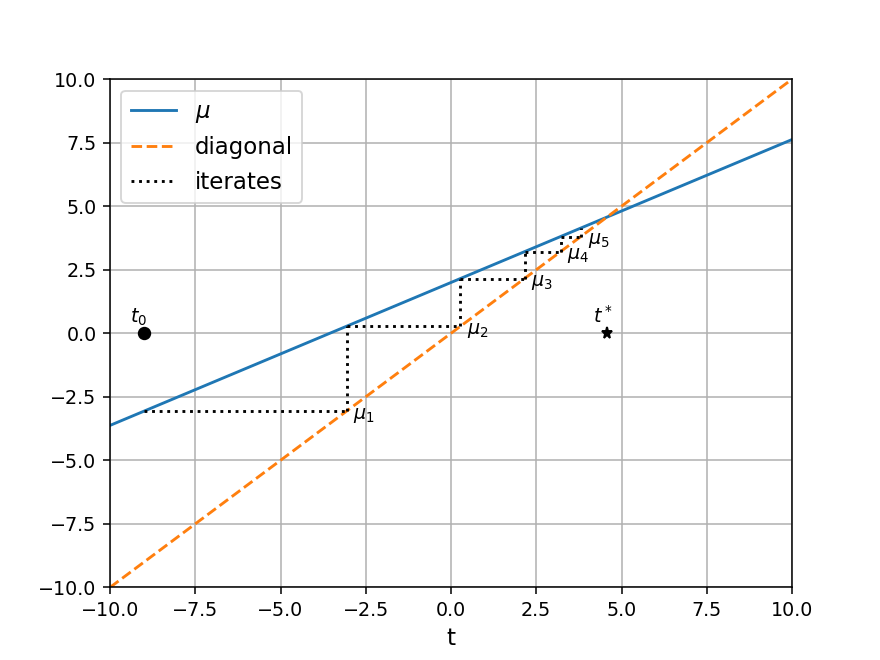

In [25]:
# Moebius Cobwebbing
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-10,10,101)

sigma = 2
alpha = 3/4
theta = 0
N = np.array([[1,sigma],[0,1]])
A = np.array([[alpha,0],[0, 1/alpha]])
K = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
M = N@A@K
plt.plot(t,(M[0,0]*t+M[0,1])/(M[1,0]*t+M[1,1])) #,'.')
plt.plot(t,t,'--')

t = -9
t0 = t

for i in range(1,6):
    v = (M[0,0]*t+M[0,1])/(M[1,0]*t+M[1,1])
    plt.plot([t,v],[v,v],'k:')    # horizontal
    plt.text(v+.2, v-.3, '$\mu_'+str(i)+'$')  # label the iterates
    t = v
    plt.plot([v,v],[v,(M[0,0]*t+M[0,1])/(M[1,0]*t+M[1,1])], 'k:')  # vertical
    
plt.xlabel('t', fontsize=12)
plt.legend(['$\mu$', 'diagonal', 'iterates'], fontsize=12)

tstar = 32/7
plt.plot(tstar,0,'k*')
plt.text(tstar-.4,0.4,'$t^*$')
plt.plot(t0,0,'ko')
plt.text(t0-.4,0.4,'$t_0$')
plt.axis([-10,10,-10,10])
plt.grid('on')

\begin{myfig}\label{fig:mu2stab} Illustration of the $\mu$ from (\ref{eq:mu2stab}) and its finite fixed point, $t^*$,
and the iterates, $\mu_n$, as defined by (\ref{eq:muiter}), commencing from $t=t_0$ en route to $t^*$. \end{myfig}

As the iterates, $\mu_n$, in Figure \ref{fig:mu2stab} approach $t^*$ with increasing $n$ we deem $t^*$ **attracting**. By the same token these interates diverge from the infinite fixed point and so we deem $\infty$ and **repelling**. 

Let us examine the general product of shear and dilation.

\begin{exercise}\label{ex:muNxA} Show that 

\begin{equation}\label{eq:Napow}
  M \equiv N(\s)A(\alpha) = \begin{bmatrix} \alpha & \s/\alpha \\ 0 & 1/\alpha\end{bmatrix} \hskip 0.2in \hbox{and so}\hskip 0.2in 
  \mu(t) = \alpha^2 t + \s
\end{equation}

has the finite fixed point

\begin{equation}\label{eq:Nafp}
  t^* = \frac{\s}{1-\alpha^2}.
\end{equation}

Next show that the iterates of $\mu$, as defind in (\ref{eq:muiter}), obey

\begin{equation}\label{eq:Napow2}
  \mu_n(t) = \alpha^{2n} t + \s\sum_{j=0}^{n-1}\alpha^{2j}
\end{equation}

and so conclude that, in the limit as $n\to\infty$,

\begin{equation}\label{eq:Napow3}
  \mu_n(t)  \to \begin{cases} t^* & \hbox{if}\hskip 0.2in \alpha<1, \\ \infty & \hbox{if}\hskip 0.2in \alpha>1.\end{cases}
\end{equation}

In other words, $t^*$ is attracting when $\alpha<1$ and repelling when $\alpha>1$.
\end{exercise}

Your solution here.

Careful attention to these examples suggests that the real test for whether or not a fixed point, $t^*$, is attractive is simply whether the slope of $\mu$ is less than one there. To justify this, suppose we start our iterates at $t^*+h$ for small $h$. We use Taylor's formula to express

\begin{equation*}
  \eqalign{
  \mu_1 &= \mu(t^*+h) + \mu'(t^*)h + O(h^2) = t^* + \mu'(t^*)h + O(h^2)\\
  \mu_2 &= \mu(\mu_1) = \mu(t^* + \mu'(t^*)h + O(h^2)) = \mu(t^*) + (\mu'(t^*))^2h + O(h^2) }
\end{equation*}

Continuing in this fashion we see that $\mu_n = t^* + (\mu'(t^*))^nh + O(h^2)$ and note that this tends to $t^*$ only when
$|\mu'(t^*)|<1$. In light of (\ref{eq:muprime}) we arrive at the explicit

**Stability Criterion:** A finite fixed point $t^*$ of $\mu$ is attractive when $|ct^*+d|>1$ and repelling when $|ct^*+d|<1$.


\begin{exercise}\label{ex:fpeig} Fixed points of $\mu$ are intimately connected to eigenvalues and eigenvectors of $M$.

(a) Show that $t^*$ is a finite fixed point of $\mu$ if, and only if, $[t^*,1]$ is an eigenvector of $M$ with eigenvalue $ct^*+d$. As such, the eigenvalues of $M$ determine the stability of the finite fixed points of $\mu$.

(b) Show that if $\infty$ is a fixed point of $\mu$ then $c=0$ and $a$ is an eigenvalue of $M$ with eigenvector $[1,0]$.

(c) Confirm for the $M$ of the previous exercise that it has eigenvalue $1/\alpha$ and eigenvector $[t^*,1]$ with $t^*$ as in (\ref{eq:Nafp}), and eigenvalue $\alpha$ with eigenvector $[1,0]$.
\end{exercise}

Your solution here.

\begin{exercise}\label{ex:NxK}
When $M$ includes rotations we may use the widget above to arrive at $\mu$ with two finite fixed points. Show that the fixed points associated with $M=N(2)K(\pi/10)$ are at

\begin{equation*}
  t^*_\pm = \pm\sqrt{\frac{2\cos(\pi/10)}{\sin(\pi/10)}-1}
\end{equation*}

and determine which is attracting and which is repelling. Check your results by adapting the code that generated Figure \ref{fig:mu2stab} to this $M$.
\end{exercise}

Your solution here.

We next address the myopia in Figure \ref{fig:mu}, in that it only shows a small region of domain and range and as we move the sliders we find pieces of the curve moving into and out of our view. That figure also ignores the fact that each $\mu$ is defined at $\infty$ and that its graph wraps both horizontally and vertically. This suggests that we map our setting to the torus.

We first compress our graph, $(t,\mu(t))$, from the infinite plane to longitude and lattitude variables on the square $[-\pi,\pi]\times [-\pi,\pi]$,

\begin{equation}\label{eq:latlong}
  \theta = 2\arctan(t) \and \phi = 2\arctan(\mu(t))
\end{equation}

and then roll these onto the torus via

\begin{equation}\label{eq:torus}
  \eqalign{
    x &= (R_2 + R_1\cos(\phi))\cos(\theta) \cr
    y &= (R_2 + R_1\cos(\phi))\sin(\theta) \cr
    z &= R_1\sin(\phi) \cr}
\end{equation}

In Figure \ref{fig:Torcoord} we illustrate these toroidal coordinates, while in the following Figure \ref{fig:mumap3} we document the three-step procedure in the concrete case, $\mu(t)=-1/t$.

<IPython.core.display.Javascript object>


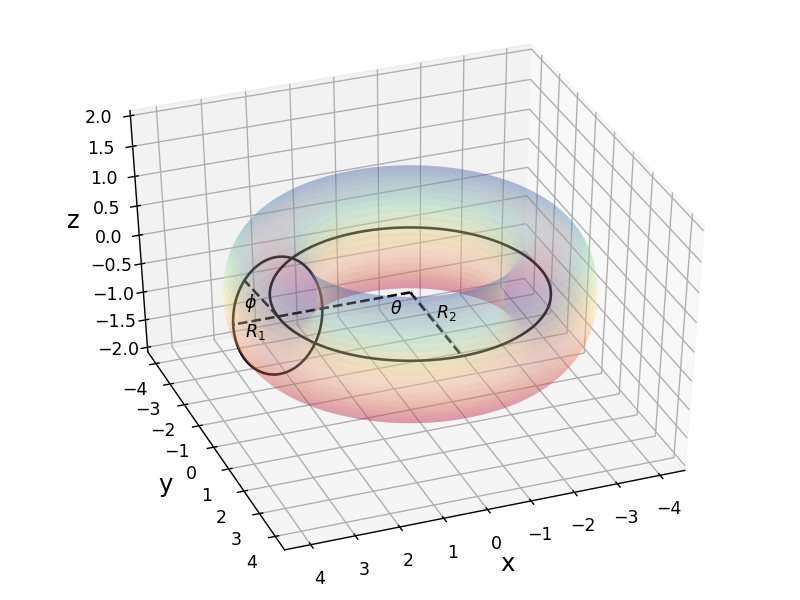

In [38]:
# torus coordinates
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work
ax.view_init(elev=40, azim=69)

# draw the torus
n = 100
theta = np.linspace(0, 2*np.pi, n)
phi = np.linspace(0, 2*np.pi, n)
Theta, Phi = np.meshgrid(theta, phi)
R1, R2 = 1, 3
x = (R2 + R1*np.cos(Theta)) * np.cos(Phi)
y = (R2 + R1*np.cos(Theta)) * np.sin(Phi)
z = R1 * np.sin(Theta)
ax.set_zlim(-2,2)
ax.plot_surface(x, y, z, alpha = 0.25, cmap='Spectral')

ax.plot3D(R2*np.cos(theta), R2*np.sin(theta), np.zeros(n), color='k')
ax.plot3D(R2 + R1*np.cos(theta), np.zeros(n), R1*np.sin(theta), color='k')
ax.plot3D([0, R2+R1], [0, 0], [0, 0], color='k', linestyle='--')
ax.plot3D([0, 0], [0, R2], [0, 0], color='k', linestyle='--')
ax.text3D(0, R2/2, 0.1, '$R_2$')
ax.plot3D([R2, R2 + R1*np.cos(np.pi/4)], [0, 0], [0, R1*np.sin(np.pi/4)], color='k', linestyle='--')
ax.text3D(R2/4, R2/4, 0, '$\\theta$')
ax.text3D(R2 + 3*R1/4, 0, R1/4, '$\phi$')
ax.text3D(R2 + 3*R1/4, 0, -R1/4, '$R_1$')

ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14)
fig.tight_layout()

\begin{myfig}\label{fig:Torcoord} The torus is a circle of radius $R_1$, described by angle $\phi$, centered on a circle of radius $R_2$, described by angle $\theta$. The precise $(x,y,z)$ coordinates are expressed in (\ref{eq:torus}).\end{myfig}

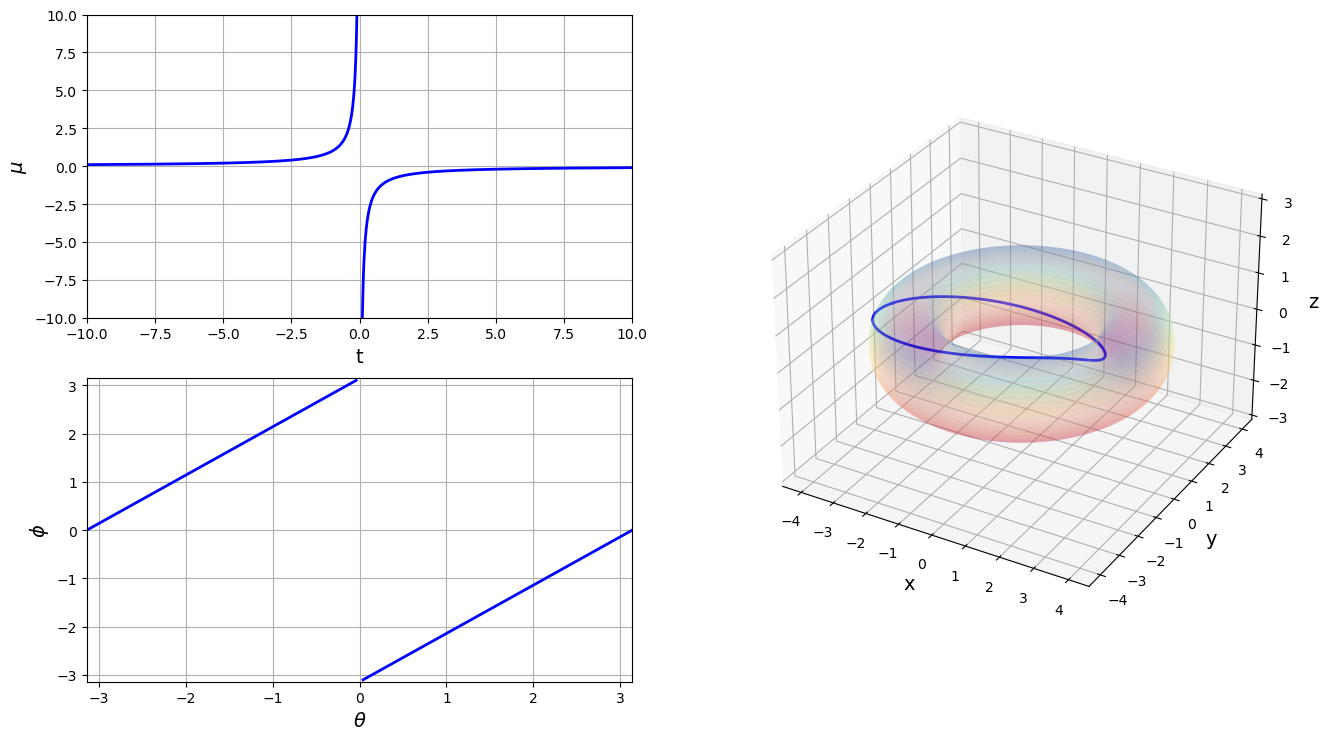

In [3]:
# torus projection setup
# 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(' ')

ax1 = fig.add_subplot(221)
t = np.linspace(-1000,1000,100001)
t[50000] = np.nan
mu = -1/t   # K(pi/2)
ax1.plot(t, mu, 'b', linewidth=2)
ax1.axis([-10,10,-10,10])
ax1.set_xlabel('t', fontsize=14)
ax1.set_ylabel('$\mu$', fontsize=14)
ax1.grid('on')

ax2 = fig.add_subplot(223)
u = 2*np.arctan(t)
v = 2*np.arctan(mu)
ax2.plot(u,v,'b', linewidth=2)
ax2.axis([-np.pi, np.pi,-np.pi, np.pi])
ax2.set_xlabel('$\\theta$', fontsize=14)
ax2.set_ylabel('$\phi$', fontsize=14)
ax2.grid('on')

ax3 = fig.add_subplot(122, projection='3d')

# draw the torus
n = 100
theta = np.linspace(0, 2*np.pi, n)
phi = np.linspace(0, 2*np.pi, n)
theta, phi = np.meshgrid(theta, phi)
R1, R2 = 1, 3
x = (R2 + R1*np.cos(theta)) * np.cos(phi)
y = (R2 + R1*np.cos(theta)) * np.sin(phi)
z = R1 * np.sin(theta)
ax3.set_zlim(-3,3)
ax3.plot_surface(x, y, z, alpha = 0.25, cmap='Spectral')

# map these to torus and plot
x = (R2 + R1*np.cos(v))*np.cos(u)
y = (R2 + R1*np.cos(v))*np.sin(u)
z = R1*np.sin(v)
ax3.plot3D(x,y,z, 'b', linewidth=2)
ax3.set_xlabel('x', fontsize=14)
ax3.set_ylabel('y', fontsize=14)
ax3.set_zlabel('z', fontsize=14)

plt.subplots_adjust(right=2, top=1.5) #, wspace=0.25)   # spread things out

\begin{myfig}\label{fig:mumap3} The transformation of the graph of $\mu(t)=-1/t$, the fractional linear transformation associated with $K(\pi/2)$, rotation by $\pi/2$. At upper-left we see our close up Cartesian view. At lower-left we see the image of
this curve under the $\arctan$ compression stated in (\ref{eq:latlong}). Finally, at right, we map this compressed image on the surface of the torus, per (\ref{eq:torus}).
\end{myfig}

It remains to widgetize this process and to also plot the transformed diagonal and identify the fixed points as the crossings of our two closed curves.

<IPython.core.display.Javascript object>


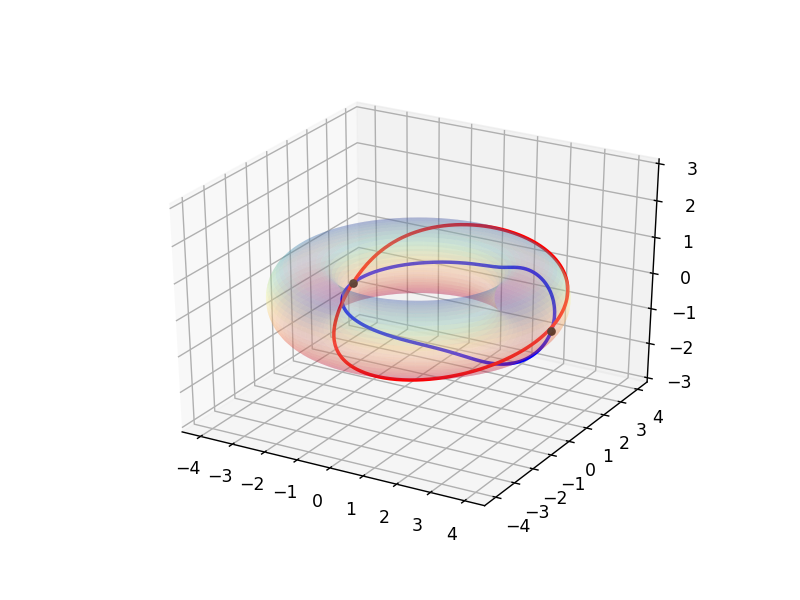

interactive(children=(FloatSlider(value=0.0, description='shear: $\\sigma$', max=10.0, min=-10.0, step=0.2), F…

In [1]:
# torus projection
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work

# draw the torus
n = 100
theta = np.linspace(0, 2*np.pi, n)
phi = np.linspace(0, 2*np.pi, n)
theta, phi = np.meshgrid(theta, phi)
R1, R2 = 1, 3
x = (R2 + R1*np.cos(theta)) * np.cos(phi)
y = (R2 + R1*np.cos(theta)) * np.sin(phi)
z = R1 * np.sin(theta)
ax.set_zlim(-3,3)
ax.plot_surface(x, y, z, alpha = 0.25, cmap='Spectral')

# construct M = NAK
sigma = 0
alpha = 2
theta = 0 #np.pi/2
N = np.array([[1,sigma],[0,1]])
A = np.array([[alpha,0],[0, 1/alpha]])
K = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
M = N@A@K

# construct planar coordinates of mu (the fractional linear transformation associated with M)
X = np.linspace(-10,10,10001)
X = X**3
Y = (M[0,0]*X+M[0,1])/(M[1,0]*X+M[1,1])

# map these to torus and plot
u = 2*np.arctan(X)
v = 2*np.arctan(Y)
x = (R2 + R1*np.cos(v))*np.cos(u)
y = (R2 + R1*np.cos(v))*np.sin(u)
z = R1*np.sin(v)
FLT, = ax.plot3D(x,y,z, color='b', linewidth=2)

# map the planar diagonal to the torus
Y = X     # the diagonal
u = 2*np.arctan(X)
v = 2*np.arctan(Y)
Dx = (R2 + R1*np.cos(v))*np.cos(u)
Dy = (R2 + R1*np.cos(v))*np.sin(u)
Dz = R1*np.sin(v)
ax.plot3D(Dx,Dy,Dz, color = 'r', linewidth=2);

# find and label crossings, where [x,y,z]=[Dx,Dy,Dz]
loc = np.where((x-Dx)**2 + (y-Dy)**2 + (z-Dz)**2 < 1e-2)[0] 
nloc = np.size(loc)
if nloc > 0:
    loclist = np.array([loc[0]])
    for ind in range(1,nloc):
        if (loc[ind] != loc[ind-1] + 1):  # ignore sequential hits
            loclist = np.append(loclist, loc[ind])
        
    nloclist = np.size(loclist)
 
    if nloclist > 1:  # now check if last is same as first (point at infinity)
        p0 = np.array([x[loclist[0]],y[loclist[0]],z[loclist[0]]])
        pend = np.array([x[loclist[-1]],y[loclist[-1]],z[loclist[-1]]])
        if (np.linalg.norm(p0-pend) < 1):
            nloclist = nloclist - 1

    FP, = ax.plot3D(x[loclist[:nloclist]],y[loclist[:nloclist]],z[loclist[:nloclist]],'k.', markersize=8)
    
    
def update( sigma=widgets.FloatSlider(min=-10, max=10, step=0.2, value=0, description='shear: $\sigma$'), 
            alpha=widgets.FloatSlider(min=0.1, max=10, step=0.1, value=2, description='dilation: $\\alpha$'), 
            theta=widgets.FloatSlider(min=0, max=2*np.pi, step=np.pi/50, value=0, description='rotation: $\\theta$') ):
    
    N = np.array([[1,sigma],[0,1]])
    A = np.array([[alpha,0],[0, 1/alpha]])
    K = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    M = N@A@K
    
    Y = (M[0,0]*X+M[0,1])/(M[1,0]*X+M[1,1])
    u = 2*np.arctan(X)
    v = 2*np.arctan(Y)
    x = (R2 + R1*np.cos(v))*np.cos(u)
    y = (R2 + R1*np.cos(v))*np.sin(u)
    z = R1*np.sin(v)
    FLT.set_data_3d([x,y,z])
    
    # find and label crossings, where [x,y,z]=[Dx,Dy,Dz]
    loc = np.where((x-Dx)**2 + (y-Dy)**2 + (z-Dz)**2 < 1e-2)[0] 
    nloc = np.size(loc)
    if nloc > 0:
        loclist = np.array([loc[0]])
        for ind in range(1,nloc):
            if (loc[ind] != loc[ind-1] + 1):  # ignore sequential hits
                loclist = np.append(loclist, loc[ind])
        
        nloclist = np.size(loclist)
 
        if nloclist > 1:  # now check if last is same as first (point at infinity)
            p0 = np.array([x[loclist[0]],y[loclist[0]],z[loclist[0]]])
            pend = np.array([x[loclist[-1]],y[loclist[-1]],z[loclist[-1]]])
            if (np.linalg.norm(p0-pend) < 1):
                nloclist = nloclist - 1

        FP.set_data_3d(x[loclist[:nloclist]],y[loclist[:nloclist]],z[loclist[:nloclist]])
    
    else:
        FP.set_data_3d([np.nan,np.nan,np.nan])
    
    fig.canvas.draw_idle()

interact(update);

\begin{myfig}\label{fig:mutorus} The illustration of the graph of $\mu$ (blue) and the diagonal (red), with fixed points labeled by black dots. The widget begins at $A(2)$ with fixed points at $0$ and $\infty$. Add some shear and observe the motion of the finite fixed point while $\infty$ remains fixed. Explore pure rotation and observe the dissappearance of fixed points. \end{myfig}

\begin{exercise}\label{ex:TorFP} Edit the widget above to distinguish, via marker-type and/or color, attracting from repelling fixed points, by checking the size of $ct^*+d$.
\end{exercise}

In closing, we note that as $M\in\maR^{2\times 2}$ can map but 2 source points to 2 target points, as a projective transfomation it can map 3 source lines to 3 target lines.

Let us now demonstrate how to transform the three lines $\ell([t_i,1])$, where $i=1,2,3$, to the three lines $\ell([s_i,1])$ with a single matrix.
We note that $M[t_i,1]=[s_i,1]$ reads $\mu(t_i)=s_i$, i.e.,

\begin{equation*}
 \eqalign{at_1 + b &= s_1(ct_1+d) \cr
     at_2 + b &= s_2(ct_2+d) \cr
     at_3 + b &= s_3(ct_3+d)}
\end{equation*}

This is a set of three equations in the four unknown elements of $M$. We solve such systems by selective elimination of variables by taking linear combinations of the equations. To simplify the arithmetic we make the concrete choice

\begin{equation*}
  t_i = i \and s_i = i+1
\end{equation*}

and so arrive at

\begin{equation*}
 \eqalign{a + b &= 2c + 2d \cr
     2a + b &= 6c + 3d \cr
     3a + b &= 12c + 4d}
\end{equation*}

If we begin by subtracting the first from the second and third

\begin{equation*}
 \eqalign{a + b &= 2c + 2d \cr
     a &= 4c + d \cr
     2a &= 10c + 2d}
\end{equation*}

We have eliminated $b$ from the last 2 equations. If we now multiply the second by $2$ and subtract it from the third we arrive at

\begin{equation*}
 \eqalign{a + b &= 2c + 2d \cr
     a &= 4c + d \cr
     0 &= 2c}
\end{equation*}

This last equation renders $c=0$, and this in turn, on substitution into the two equations above it render $a=b=d$. Without loss we set this common value to $1$ and so find that

\begin{equation*}
 M = \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix}
\end{equation*}

takes the three lines, $\{\ell([1,1]),\ell([2,1]),\ell([3,1)\}$ to $\{\ell([2,1]),\ell([3,1]),\ell([4,1])\}$.

\begin{exercise}\label{ex:P1x1}
Find the projective transformation that takes $t_i=i$ to $s_i = 1/i$ for $i=1,2,3$.
\end{exercise}

Your answer here.